In [2]:
import pandas as pd 
wcm=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCupMatches.csv") 
wcp=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCupPlayers.csv") 
wc=pd.read_csv(r"C:\Users\DEV\Desktop\project\WorldCups.csv") 


In [3]:
wcp = wcp.dropna()
wc = wc.dropna() 
wcm = wcm.dropna() 
wc = wc.replace('Germany FR', 'Germany') 
wcp = wcp.replace('Germany FR', 'Germany')
wcm = wcm.replace('Germany FR', 'Germany') 
wcm['Stadium'] = wcm['Stadium'].str.replace('Maracan - Estdio Jornalista Mr io Filho','Maracanã Stadium') 


In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
winner=wc["Winner"] 
runners_up=wc["Runners-Up"] 
winner_count=pd.DataFrame.from_dict(winner.value_counts()) 
runners_up_count=pd.DataFrame.from_dict(runners_up.value_counts()) 
overall=winner_count.join(runners_up_count, how='outer') 
overall=overall.fillna(0) 
overall.columns=['WINNER', 'RUNNERS_UP'] 
overall=overall.astype('int64') 
overall=overall.sort_values(by=['WINNER', 'RUNNERS_UP']) 
overall.plot(y=['WINNER', 'RUNNERS_UP'], kind="bar", color =['red','blue'], align='center', figsize=(20, 10), grid=True)
plt.xlabel('Countries') 
plt.ylabel('Number of times reached final') 
plt.title('Number of times any team reaching final') 
plt.show() 



<Figure size 2000x1000 with 1 Axes>

Text(0, 0.5, 'Goals')

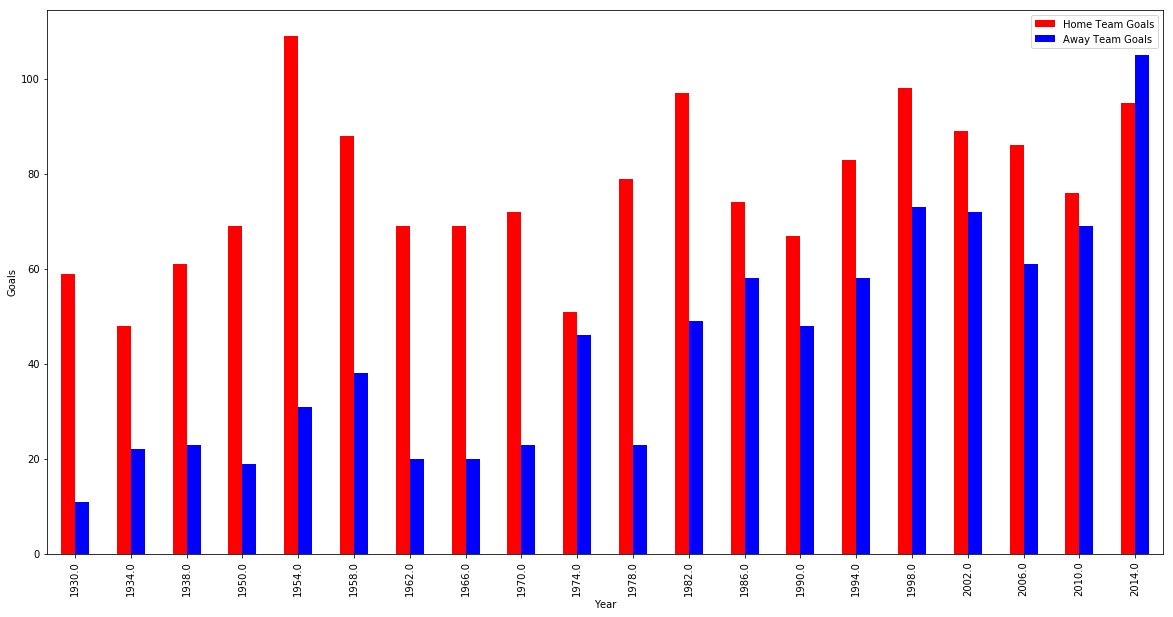

In [14]:
home_team_goal=wcm.groupby('Year') 
away_team_goal=wcm.groupby('Year') 
home_vs_away_team_goal=home_team_goal['Home Team Goals', 'Away Team Goals'].sum(
) 
home_vs_away_team_goal.plot(y=['Home Team Goals', 'Away Team Goals'], kind="bar"
, color=['red', 'blue'], align='center', figsize=(20, 10)) 
plt.ylabel('Goals') 


Text(0, 0.5, 'Attendance')

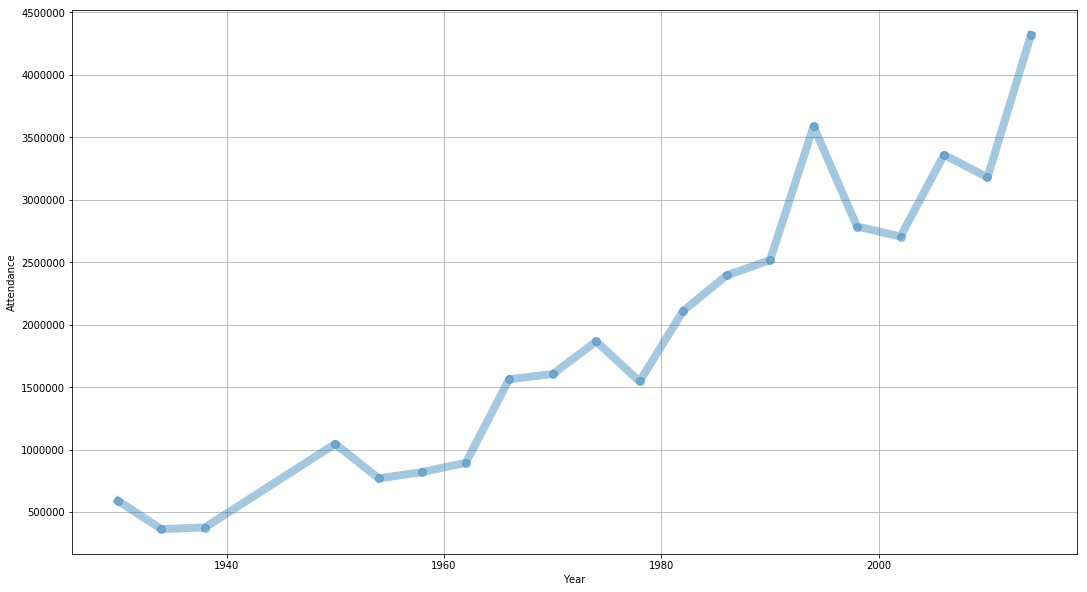

In [21]:
home_and_away_team_goal_vs_attendance=home_team_goal['Attendance'].sum() 
home_and_away_team_goal_vs_attendance.plot(y=['Attendance'], linestyle='solid', marker='o', figsize=(18,10), linewidth=8, alpha=0.4, markersize=8, 
 grid=True)
plt.ylabel('Attendance') 

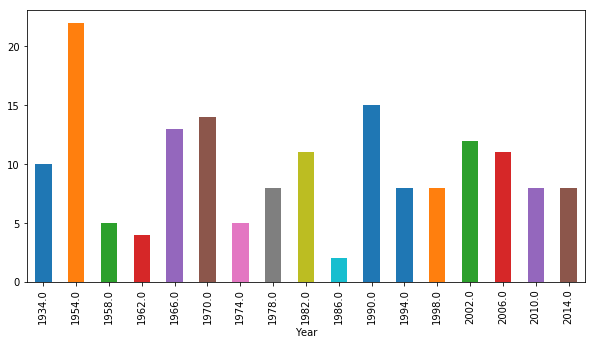

In [25]:
germany_home=wcm.groupby('Home Team Name').get_group('Germany')[['Year', 'Home Team Goals']] 
germany_away=wcm.groupby('Away Team Name').get_group('Germany')[['Year', 'Away Team Goals']] 
germany_home_goal=germany_home.groupby('Year')['Home Team Goals'].sum() 
germany_away_goal=germany_away.groupby('Year')['Away Team Goals'].sum() 
 
germany_home_goal.plot.bar(figsize=(10,5)) 


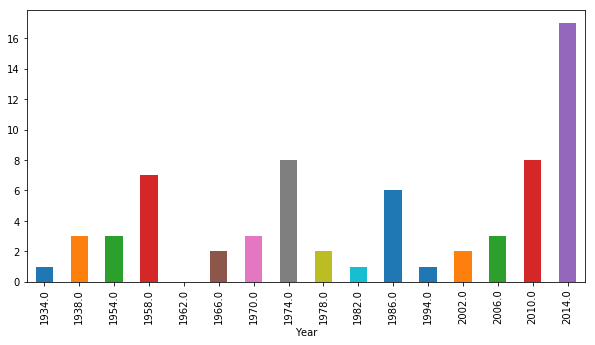

In [26]:
germany_away_goal.plot.bar(figsize=(10,5)) 

In [31]:
import seaborn as sns 
att=wcm.sort_values(by='Attendance', ascending=False)[:10] 
att=att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name', 'Home Team Goal s', 'Away Team Name', 'Attendance']] 
att['vs_team']=att["Home Team Name"] + 'vs' + att["Away Team Name"] 
plt.figure(figsize=(20,10)) 
ax=sns.barplot(x=att['Attendance'], y=att['vs_team'], palette='Blues_r', linewidth = 1,edgecolor="k"*len(att))
plt.ylabel('teams') 
plt.xlabel('Attendance') 
plt.title('Matches with highest number of attendance')
for i,j in enumerate(' stadium : '+att['Stadium']+' , Date :' + att['Datetime']) :     
    ax.text(1,i,j,fontsize = 15,color='black',weight = 'bold') 
    plt.show() 


KeyError: "['Home Team Goal s'] not in index"

In [32]:
avg_std=wcm.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort
_values(by='Attendance', ascending=False)[:10] 
plt.figure(figsize=(20,10)) 
ax=sns.barplot(x=avg_std['Attendance'], y=avg_std['Stadium'], palette='Reds_r') 
for i,j in enumerate('City:' + avg_std['City'][:10]):ax.text(1,i,j,fontsize=15) 
 
plt.title('Stadiums with highest average attendance')
plt.show() 


AttributeError: 'DataFrame' object has no attribute 'sort'